Boston Massachusetts in the 1970s! You are tasked with building a model that can provide a price estimate based on a home's characteristics like:
* The number of rooms
* The distance to employment centres
* How rich or poor the area is
* How many students there are per teacher in local schools etc

To accomplish your task you will:

1. Analyse and explore the Boston house price data
2. Split your data for training and testing
3. Run a Multivariable Regression
4. Evaluate how your model's coefficients and residuals
5. Use data transformation to improve your model performance
6. Use your model to estimate a property price

### Upgrade plotly (only Google Colab Notebook)


In [ ]:
%pip install --upgrade plotly

###  Import Statements


In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data

The first column in the .csv file just has the row numbers, so it will be used as the index.

In [ ]:
data = pd.read_csv('boston.csv', index_col=0)

### Understand the Boston House Price Dataset

---------------------------

**Characteristics:**  

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

This is a copy of [UCI ML housing dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. You can find the [original research paper here](https://deepblue.lib.umich.edu/bitstream/handle/2027.42/22636/0000186.pdf?sequence=1&isAllowed=y).


# Preliminary Data Exploration

* What is the shape of `data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(data.shape)
print(data.columns)
data.head()

(506, 14)
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.01,18.00,2.31,0.00,0.54,6.58,65.20,4.09,1.00,296.00,15.30,396.90,4.98,24.00
1,0.03,0.00,7.07,0.00,0.47,6.42,78.90,4.97,2.00,242.00,17.80,396.90,9.14,21.60
2,0.03,0.00,7.07,0.00,0.47,7.18,61.10,4.97,2.00,242.00,17.80,392.83,4.03,34.70
3,0.03,0.00,2.18,0.00,0.46,7.00,45.80,6.06,3.00,222.00,18.70,394.63,2.94,33.40
4,0.07,0.00,2.18,0.00,0.46,7.15,54.20,6.06,3.00,222.00,18.70,396.90,5.33,36.20


In [ ]:
print(f'Are there duplicates around here?: {data.isna().values.any()}')
print(f'Are there any duplicates in the Data?: {data.duplicated().values.any()}')

Are there duplicates around here?: False
Are there any duplicates in the Data?: False


## Data Cleaning - Check for Missing Values and Duplicates

In [ ]:
data.isna().values.any()

False

In [ ]:
data.duplicated().any()

False

In [ ]:
data[data.duplicated()].values.any()

False

## Descriptive Statistics

* How many students are there per teacher on average?
* What is the average price of a home in the dataset?
* What is the `CHAS` feature?
* What are the minimum and the maximum value of the `CHAS` and why?
* What is the maximum and the minimum number of rooms per dwelling in the dataset?

In [ ]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [ ]:
print(f'There are on average {data.PTRATIO.mean():.2f}% students per teacher.')
print(f'The average price of a home is: ${data.PRICE.mean():.2f}0')
print('The "CHAS" feature is just a way to increase or decrease the score (price) of a house if tract bounds river.')

There are on average 18.46% students per teacher.
The average price of a home is: $22.530
The "CHAS" feature is just a way to increase or decrease the score (price) of a house if tract bounds river.


In [ ]:
print(f'CHAS Max. value = {data.CHAS.max()} and CHAS Min. Value = {data.CHAS.min()}. The value is 1 if the house borders the river, otherwise the value is 0')
print(f'The Maximum number of rooms per dwelling are on average: {data.RM.max()} and the Minimum: {data.RM.min()}')

CHAS Max. value = 1.0 and CHAS Min. Value = 0.0. The value is 1 if the house borders the river, otherwise the value is 0
The Maximum number of rooms per dwelling are on average: 8.78 and the Minimum: 3.561


## Visualise the Features

Having looked at some descriptive statistics, visualise the data for your model. Use Seaborn's `.displot()` to create a bar chart and superimpose the Kernel Density Estimate for the following variables:
* PRICE: The home price in thousands.
* RM: the average number of rooms per owner unit.
* DIS: the weighted distance to the 5 Boston employment centres i.e., the estimated length of the commute.
* RAD: the index of accessibility to highways.

Try setting the `aspect` parameter to `2` for a better picture.

#### House Prices

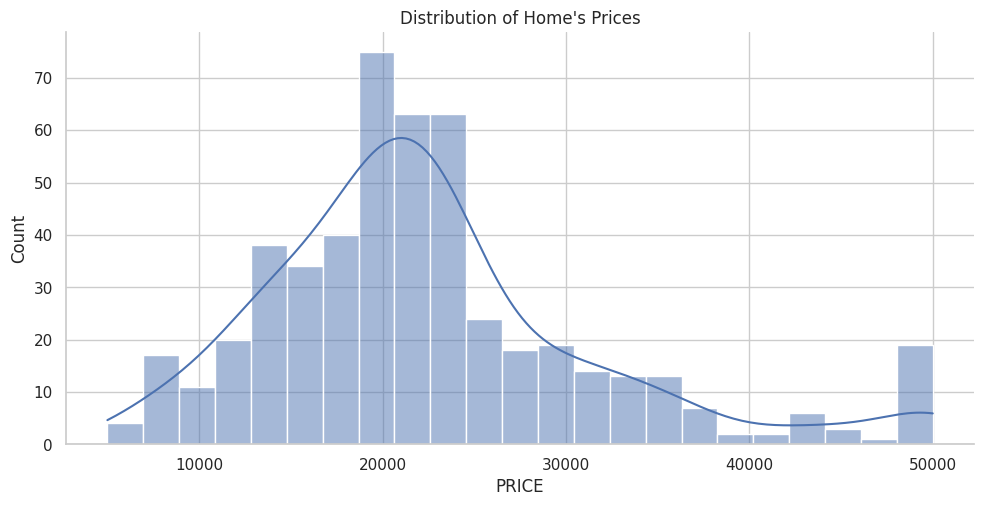

In [ ]:
data_price = data['PRICE'] * 1000
sns.set(style='whitegrid')

price = sns.displot(data_price,
            kde=True,
            aspect = 2,
            )

price.set(title="Distribution of Home's Prices")

#### Distance to Employment - Length of Commute

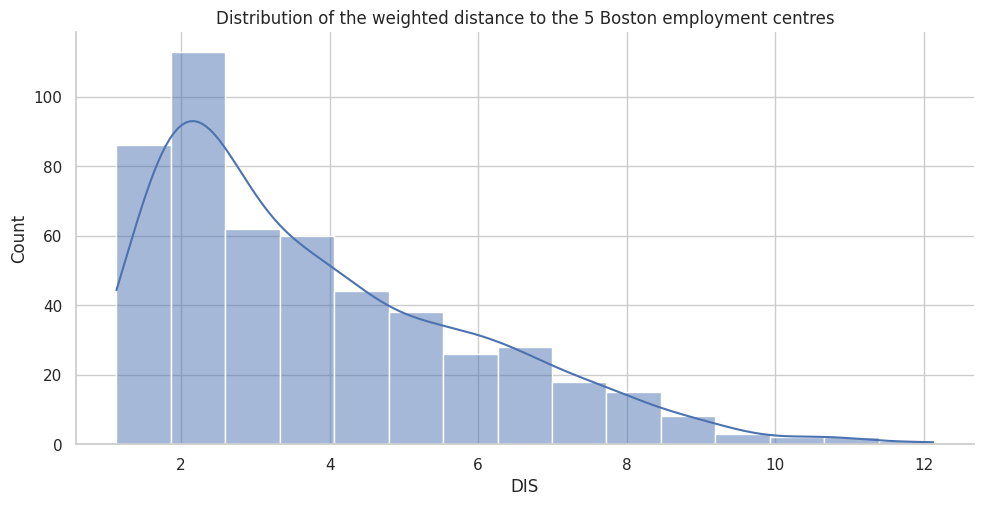

In [ ]:
dis = sns.displot(data.DIS,
            kde=True,
            aspect=2,
            )
dis.set(title='Distribution of the weighted distance to the 5 Boston employment centres')

#### Number of Rooms

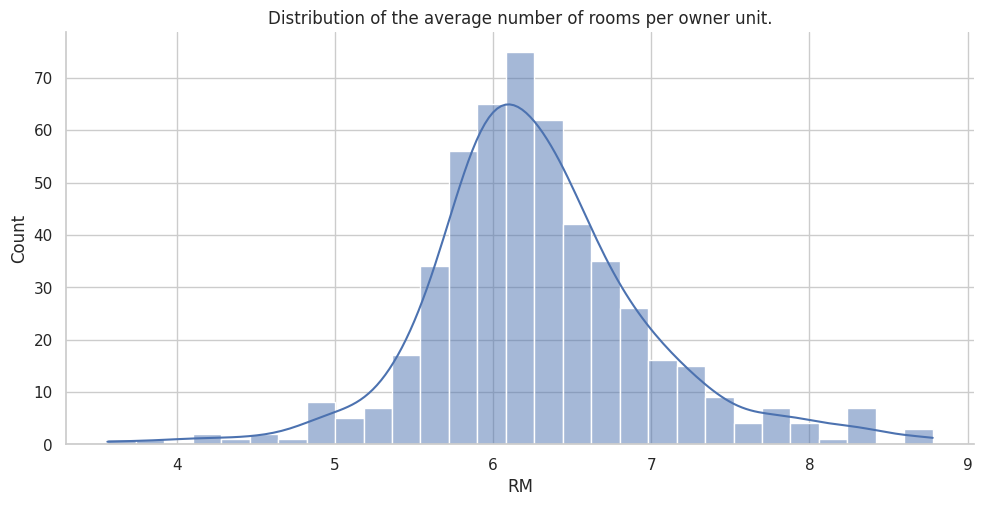

In [ ]:
rm = sns.displot(data.RM,
            kde=True,
            aspect=2,
            )
rm.set(title="Distribution of the average number of rooms per owner unit.")

#### Access to Highways 🛣

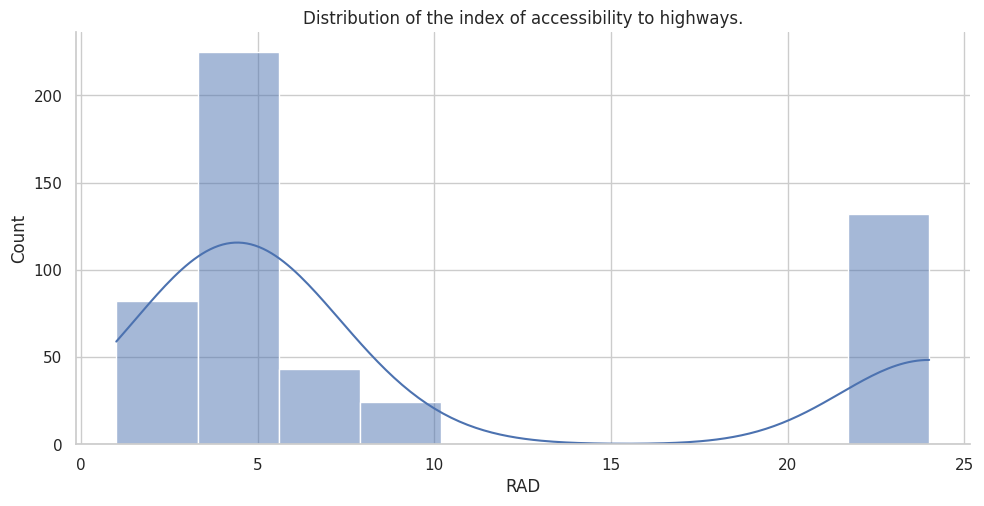

In [ ]:
rad = sns.displot(data.RAD,
            kde=True,
            aspect=2,
            )
rad.set(title='Distribution of the index of accessibility to highways.')

#### Next to the River?

Create a bar chart with plotly for CHAS to show many more homes are away from the river versus next to it.

In [ ]:
near_river = data.CHAS.value_counts()
near_river

0.00    471
1.00     35
Name: CHAS, dtype: int64

In [ ]:
fig = px.bar(
       x=['No', 'Yes'],
       y=near_river.values,
      color=near_river.values,
       title='Next to Charles River?'
       )

fig.update_layout(coloraxis_showscale=False,
                  xaxis_title='Property Located Next to the River?',
                  yaxis_title='Number of Homes')


# Understand the Relationships in the Data

### Run a Pair Plot

There might be some relationships in the data that we should know about. Before you run the code, make some predictions:

* What would you expect the relationship to be between pollution (NOX) and the distance to employment (DIS)?
* What kind of relationship do you expect between the number of rooms (RM) and the home value (PRICE)?
* What about the amount of poverty in an area (LSTAT) and home prices?

Visualise all the relationships at the same time.

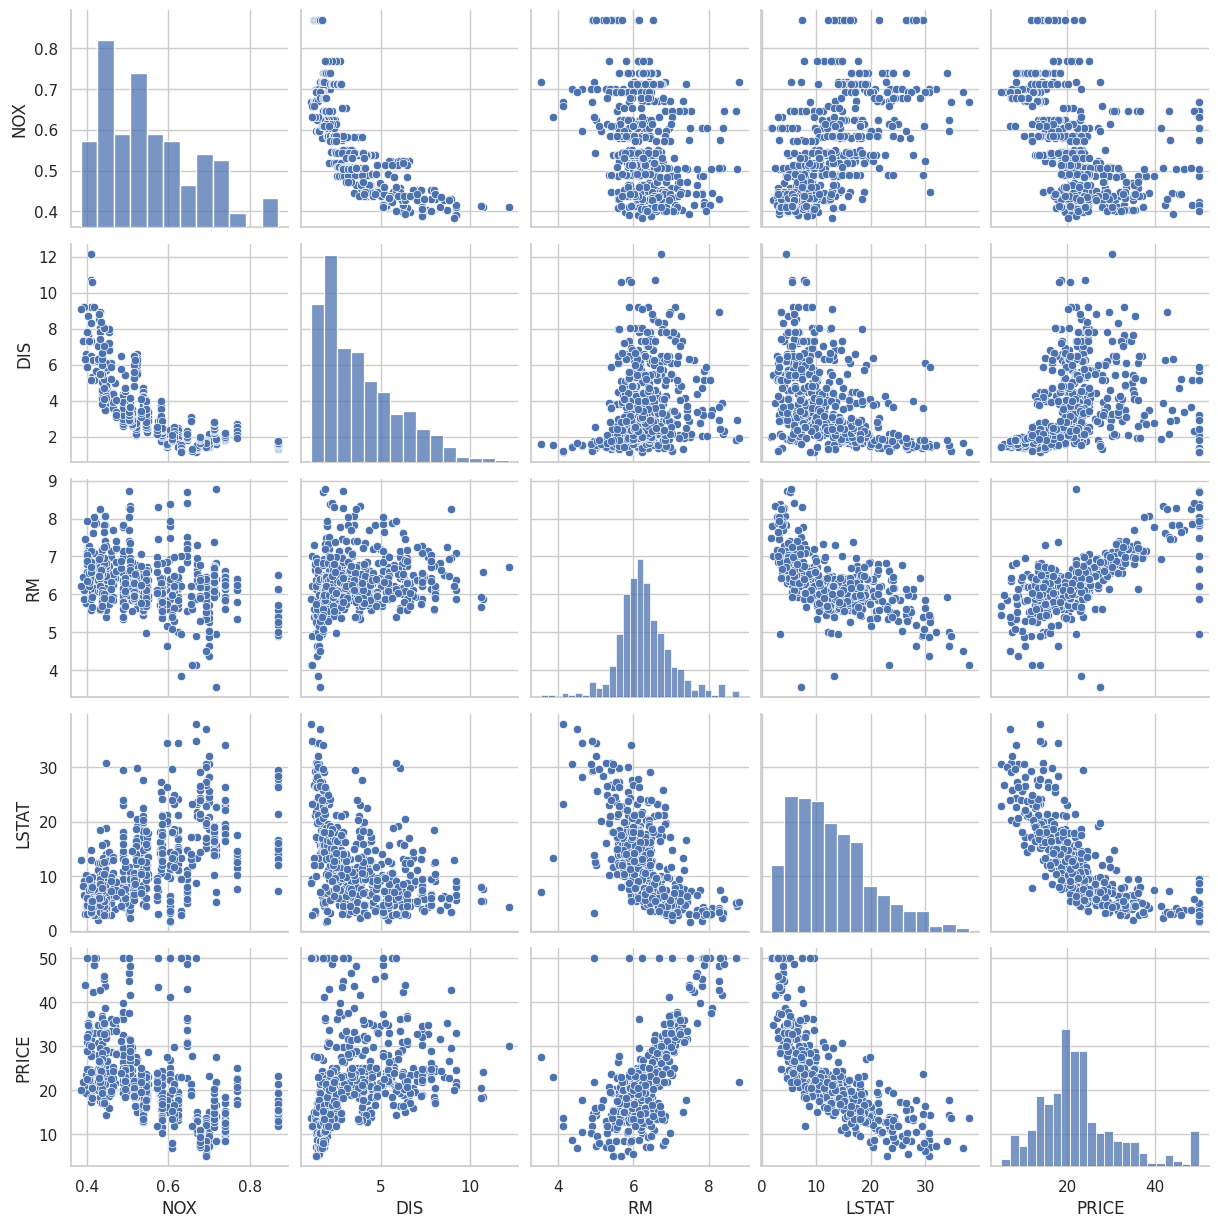

In [ ]:
sns.set(style='whitegrid')

sns.pairplot(data, vars=['NOX','DIS', 'RM', 'LSTAT', 'PRICE'])


Use Seaborn's `.jointplot()` to look at some of the relationships in more detail. Create a jointplot for:

* DIS and NOX
* INDUS vs NOX
* LSTAT vs RM
* LSTAT vs PRICE
* RM vs PRICE

#### Distance from Employment vs. Pollution

Compare DIS (Distance from employment) with NOX (Nitric Oxide Pollution) using Seaborn's `.jointplot()`. Does pollution go up or down as the distance increases?

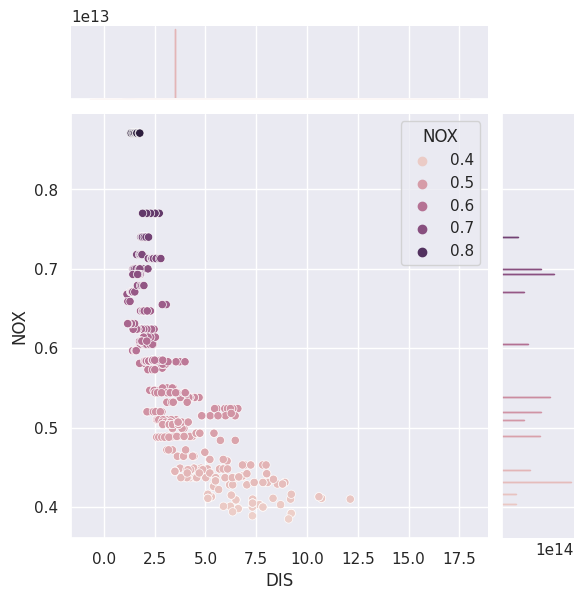

In [ ]:
sns.set(style='darkgrid')
sns.jointplot(x='DIS', y='NOX', data=data, hue='NOX')

#### Proportion of Non-Retail Industry versus Pollution

Compare INDUS with NOX using Seaborn's `.jointplot()`. Does pollution go up or down as there is a higher proportion of industry?

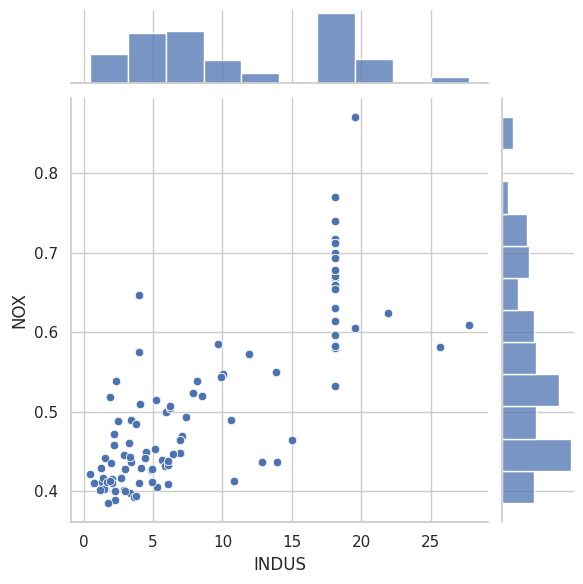

In [ ]:
with sns.axes_style('whitegrid'):
  sns.jointplot(x='INDUS', y='NOX', data=data)

#### % of Lower Income Population vs Average Number of Rooms

Compare LSTAT with RM using Seaborn's `.jointplot()`. How does the number of rooms per dwelling vary with the poverty of area? Do homes have more or fewer rooms when LSTAT is low?

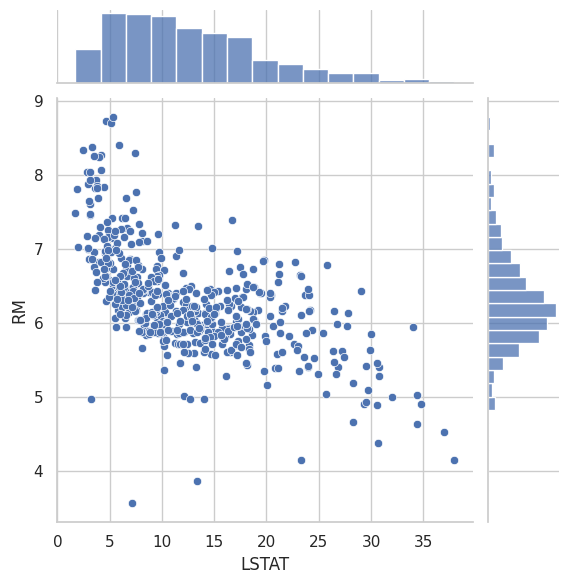

In [ ]:
with sns.axes_style('whitegrid'):
  sns.jointplot(x='LSTAT', y='RM', data=data)

#### % of Lower Income Population versus Home Price

Compare LSTAT with PRICE using Seaborn's `.jointplot()`. How does the proportion of the lower-income population in an area affect home prices?

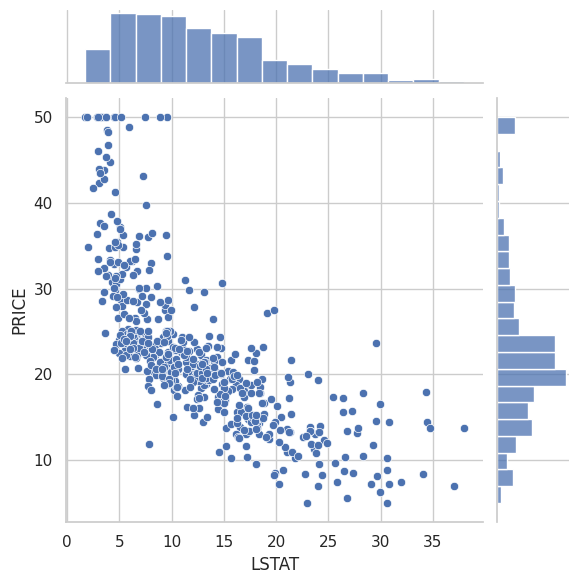

In [ ]:
with sns.axes_style('whitegrid'):
  sns.jointplot(x='LSTAT', y='PRICE', data=data)

#### Number of Rooms versus Home Value

Compare RM with PRICE.

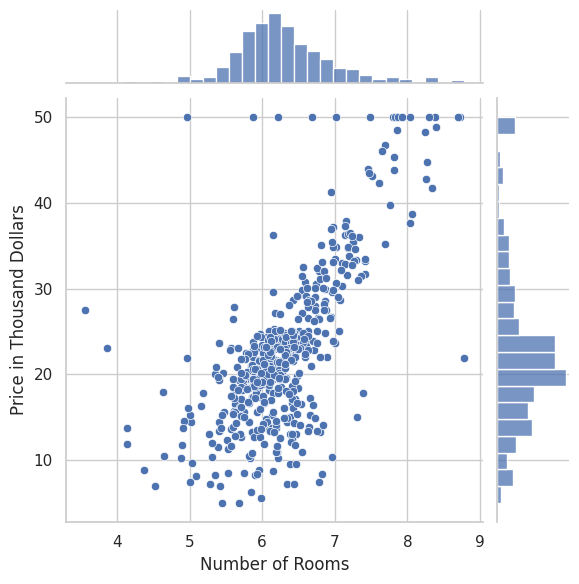

In [ ]:
with sns.axes_style('whitegrid'):
  ax = sns.jointplot(x='RM', y='PRICE', data=data)

  ax.set_axis_labels('Number of Rooms', 'Price in Thousand Dollars')

# Split Training & Test Dataset

* Split the training and testing data roughly 80/20.
* To get the same random split every time you run your notebook use `random_state=10`.

In [ ]:
X = data.drop('PRICE', axis=1)
y = data['PRICE']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Multivariable Regression

Our Linear Regression model form:

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

### Run Your First Regression

Run the regression on the training dataset. How high is the r-squared for the regression on the training data?

In [ ]:
regression = LinearRegression()
regression.fit(X_train, y_train)
#Theta 0 / y-intercept
theta_0 = regression.intercept_
#Theta 1 / slope
theta_1 = regression.coef_
# r-squared
r_squared = regression.score(X_train, y_train)
print(f'r-squared: {r_squared}')


r-squared: 0.750121534530608


In [ ]:
theta_1

array([-1.28180656e-01,  6.31981786e-02, -7.57627602e-03,  1.97451452e+00,
       -1.62719890e+01,  3.10845625e+00,  1.62922153e-02, -1.48301360e+00,
        3.03988206e-01, -1.20820710e-02, -8.20305699e-01,  1.14189890e-02,
       -5.81626431e-01])

### Evaluate the Coefficients of the Model

Print out the coefficients for the features.

* We already saw that RM on its own had a positive relation to PRICE based on the scatter plot. Is RM's coefficient also positive?
* What is the sign on the LSAT coefficient? Does it match your intuition and the scatter plot above?
* Check the other coefficients. Do they have the expected sign?
* Based on the coefficients, how much more expensive is a room with 6 rooms compared to a room with 5 rooms? According to the model, what is the premium you would have to pay for an extra room?

In [ ]:
column_names = X_train.columns
name = 'THETA 0'
coefficient_names = pd.Index([name]).append(column_names)
thetas = np.insert(theta_1, 0, theta_0)

thetas_df = pd.DataFrame({'feature': coefficient_names,
                          'coefficient': thetas})


In [ ]:
thetas_df

,feature,coefficient
0,THETA 0,36.53
1,CRIM,-0.13
2,ZN,0.06
3,INDUS,-0.01
4,CHAS,1.97
5,NOX,-16.27
6,RM,3.11
7,AGE,0.02
8,DIS,-1.48
9,RAD,0.30


### Analyse the Estimated Values & Regression Residuals

Next step: Evaluate our regression. How good our regression is depends not only on the r-squared. It also depends on the **residuals** - the difference between the model's predictions ($\hat y_i$) and the true values ($y_i$) inside `y_train`.


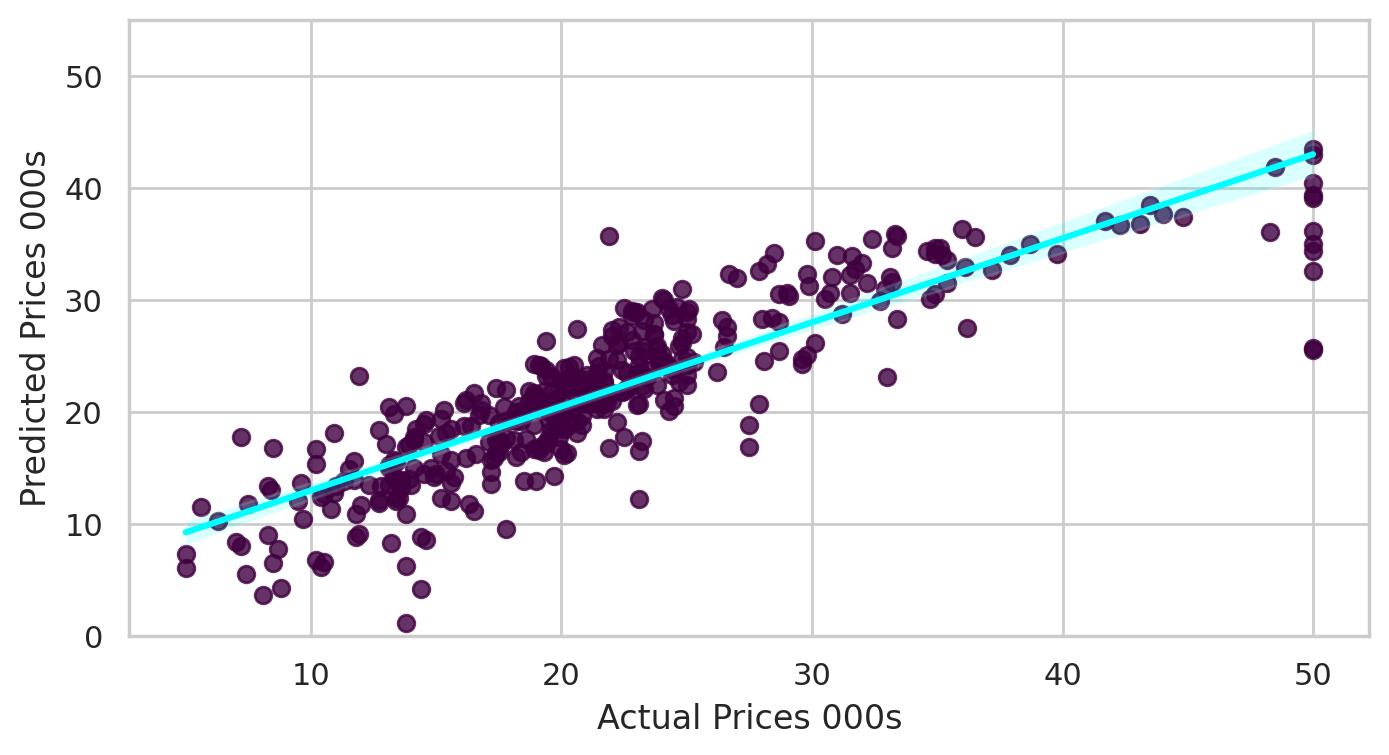

In [ ]:
predicted_values = regression.predict(X_train)
residuals = (y_train - predicted_values)

plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style('whitegrid'):
  ax = sns.regplot(x=y_train,
                   y=predicted_values,
                   color='#400040',
                   line_kws={'color': '#00FFFF'})
  ax.set(ylim=(0, 55),
         xlabel='Actual Prices 000s',
         ylabel='Predicted Prices 000s')



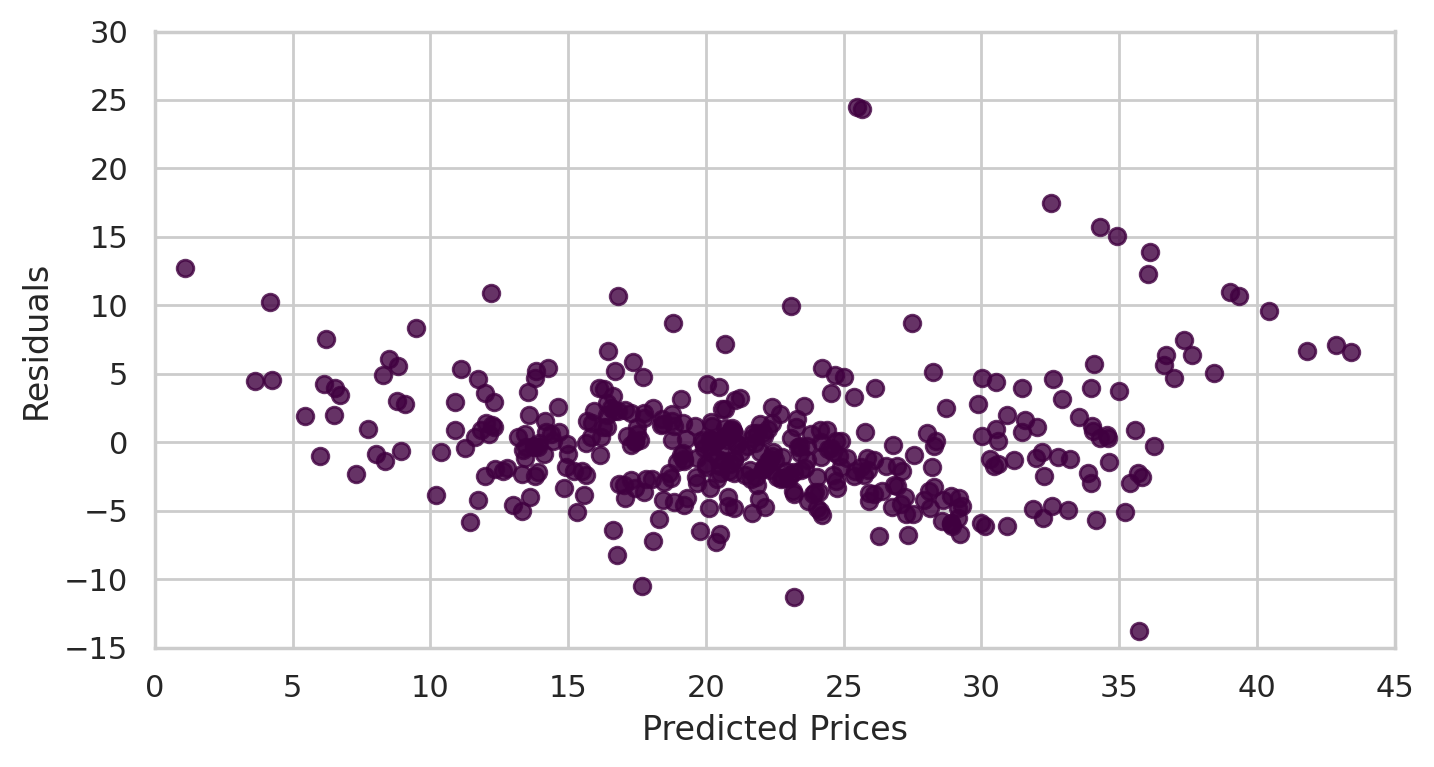

In [ ]:

plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style('whitegrid'):
    ax = sns.regplot(x=predicted_values,
                     y=residuals.values,
                     color='#400040',
                     fit_reg=False
                     )
    ax.set(xlim=(0, 45),
           ylim=(-15, 30),
           xlabel='Predicted Prices',
           ylabel='Residuals')

plt.show()

Why do we want to look at the residuals? We want to check that they look random. The residuals represent the errors of our model. If there's a pattern in our errors, then our model has a systematic bias.

We can analyse the distribution of the residuals. In particular, we're interested in the **skew** and the **mean**.

In an ideal case, what we want is something close to a normal distribution. A normal distribution has a skewness of 0 and a mean of 0. A skew of 0 means that the distribution is symmetrical - the bell curve is not lopsided or biased to one side.

* Calculate the mean and the skewness of the residuals.
* Create a histogram and superimpose the Kernel Density Estimate (KDE)
* Is the skewness different from zero? If so, by how much?
* Is the mean different from zero?

<Figure size 1600x800 with 0 Axes>

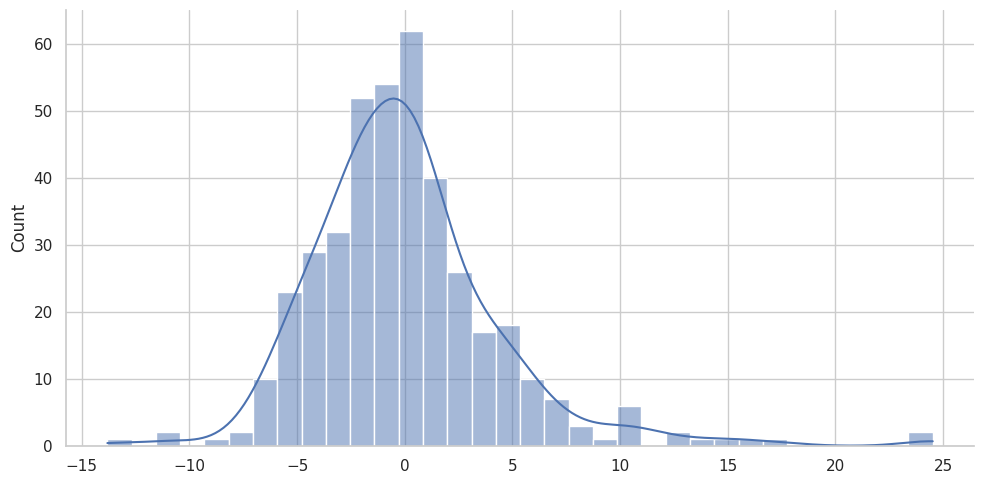

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style('whitegrid'):
  ax = sns.displot(residuals.values,
              kde=True,
              aspect=2)
plt.show()

### Data Transformations for a Better Fit

We have two options:

1. Change our model entirely. Perhaps a linear model is not appropriate.
2. Transform our data to make it fit better with our linear model.

Let's try a data transformation approach.

Investigate if the target `data['PRICE']` could be a suitable candidate for a log transformation.

* Show a histogram and KDE of the price data.
* Calculate the skew of that distribution.
* Create a Series that has the log prices
* Calculate the skew.
* Which distribution has a skew that's closer to zero?


<Figure size 1600x800 with 0 Axes>

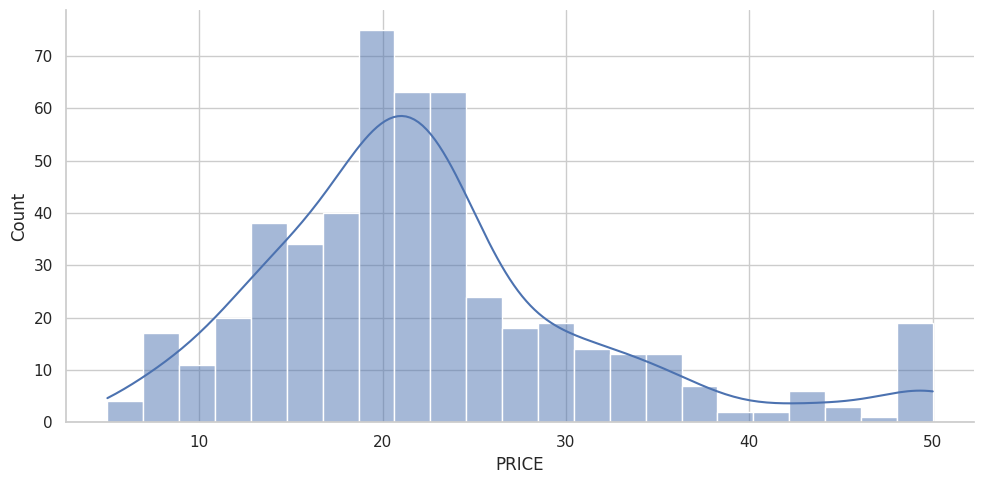

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style('whitegrid'):
  ax = sns.displot(data.PRICE,
              kde=True,
              aspect=2)
plt.show()

In [ ]:
log_prices = np.log(data.PRICE)

<Figure size 1600x800 with 0 Axes>

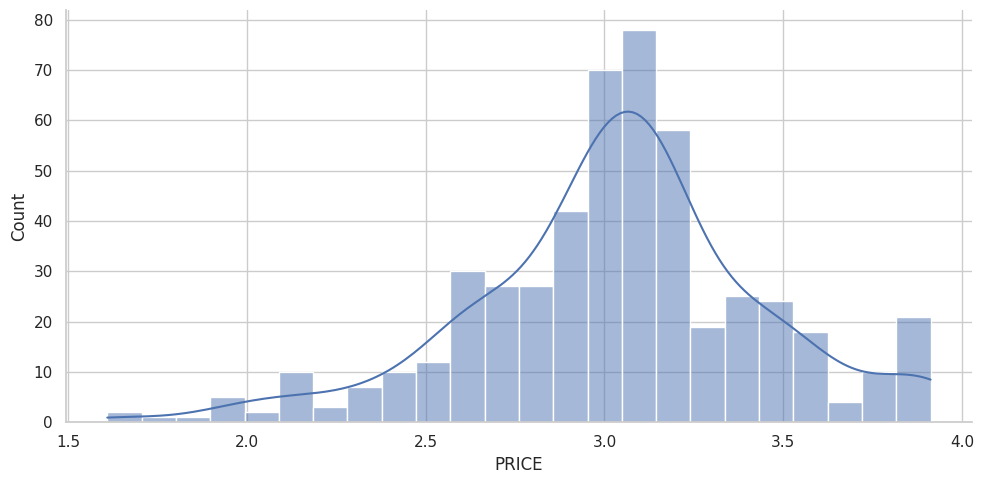

In [ ]:
plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style('whitegrid'):
  ax = sns.displot(log_prices,
              kde=True,
              aspect=2)
plt.show()

#### How does the log transformation work?

Using a log transformation does not affect every price equally. Large prices are affected more than smaller prices in the dataset.

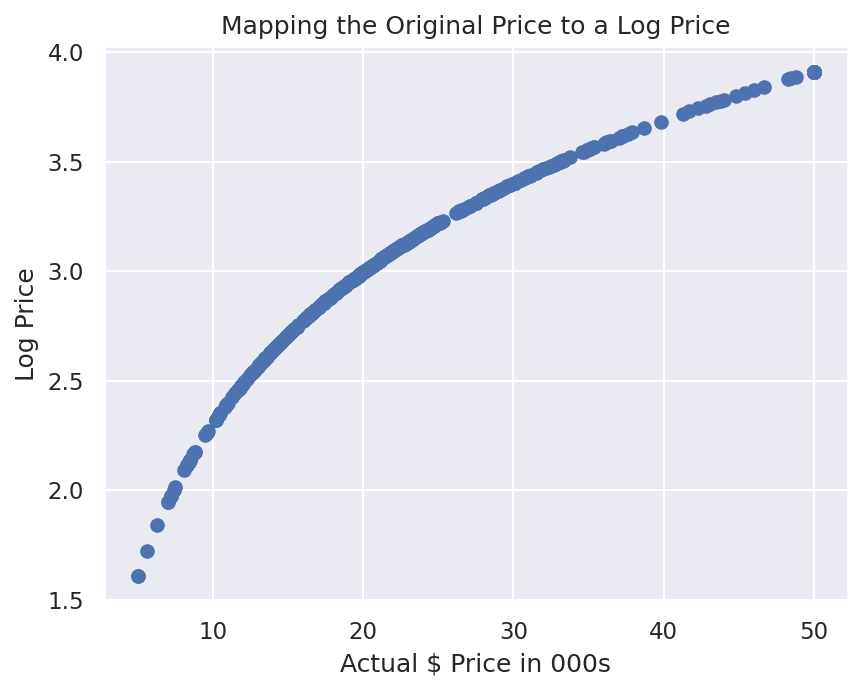

In [ ]:
plt.figure(dpi=150)
plt.scatter(data.PRICE, log_prices)

plt.title('Mapping the Original Price to a Log Price')
plt.ylabel('Log Price')
plt.xlabel('Actual $ Price in 000s')
plt.show()

## Regression using Log Prices

Our model has changed to:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$


* Make the results comparable.
* Run a second regression, but this time use the transformed target data.
* What is the r-squared of the regression on the training data?
* Have we improved the fit of our model compared to before based on this measure?


In [ ]:
features = data.drop('PRICE', axis=1)
new_target = log_prices

X_train, X_test, log_y_train, log_y_test = train_test_split(features, new_target, test_size=0.2, random_state=10)

log_regression = LinearRegression()
log_regression.fit(X_train, log_y_train)


#Theta 0 / y-intercept
theta_0_a = log_regression.intercept_
#Theta 1 / slope
theta_1_a = log_regression.coef_
# r-squared
log_rsquared = log_regression.score(X_train, log_y_train)
# Prediction
log_prediction = log_regression.predict(X_train)
# Residuals
log_residuals = (log_y_train - log_prediction)

## Evaluating Coefficients with Log Prices

Print out the coefficients of the new regression model.

* Do the coefficients still have the expected sign?
* Is being next to the river a positive based on the data?
* How does the quality of the schools affect property prices? What happens to prices as there are more students per teacher?

In [ ]:
column_names = X_train.columns
name = 'THETA 0'
coefficient_names_a = pd.Index([name]).append(column_names)
thetas_a = np.insert(theta_1_a, 0, theta_0_a)

thetas_df_a = pd.DataFrame({'feature_a': coefficient_names_a,
                          'coefficient_a': thetas_a})

In [ ]:
thetas_df_a

,feature_a,coefficient_a
0,THETA 0,4.06
1,CRIM,-0.01
2,ZN,0.00
3,INDUS,0.00
4,CHAS,0.08
5,NOX,-0.70
6,RM,0.07
7,AGE,0.00
8,DIS,-0.05
9,RAD,0.01


## Regression with Log Prices & Residual Plots


* Compare the regression outcomes with the log prices side by side.

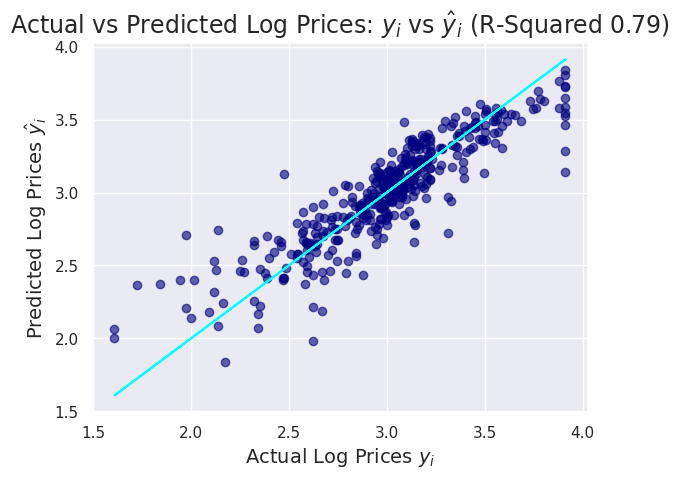

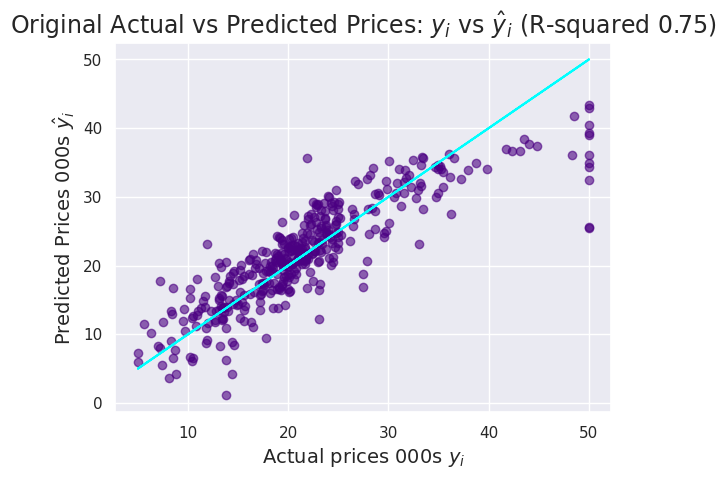

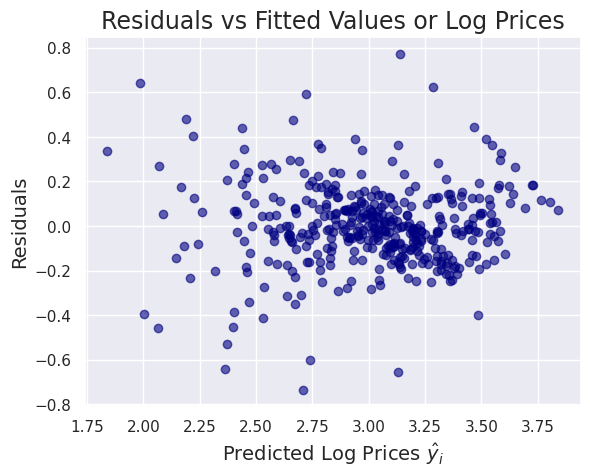

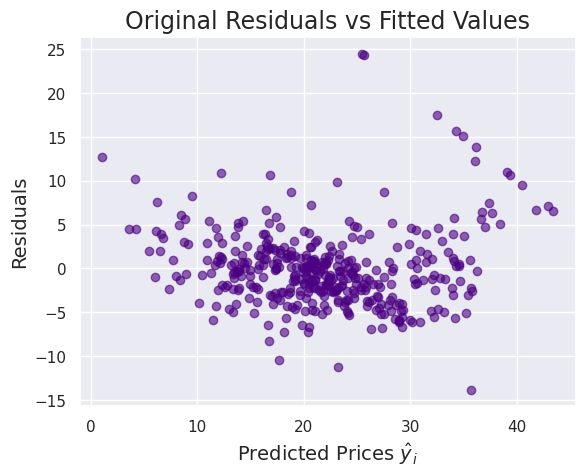

In [ ]:
#Graph of Actual vs Predicted Log Prices

plt.scatter(x=log_y_train, y=log_prediction, c='navy', alpha=0.6)
plt.plot(log_y_train, log_y_train, color='cyan')
plt.title(f'Actual vs Predicted Log Prices: $y _i$ vs $\hat y_i$ (R-Squared {log_rsquared:.2})', fontsize=17)
plt.xlabel('Actual Log Prices $y _i$', fontsize=14)
plt.ylabel('Predicted Log Prices $\hat y _i$', fontsize=14)
plt.show()

# Original Regression of Actual vs Predicted Prices
plt.scatter(x=y_train, y=predicted_values, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Original Actual vs Predicted Prices: $y _i$ vs $\hat y_i$ (R-squared {r_squared:.3})', fontsize=17)
plt.ylabel('Predicted Prices 000s $\hat y _i$', fontsize=14)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted Values (Log Prices)
plt.scatter(x=log_prediction, y=log_residuals, c='navy', alpha=0.6)
plt.title('Residuals vs Fitted Values or Log Prices', fontsize=17)
plt.xlabel('Predicted Log Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

# Residuals vs Predicted Values
plt.scatter(x=predicted_values, y=residuals, c='indigo', alpha=0.6)
plt.title('Original Residuals vs Fitted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

It's hard to see a difference here just by eye. The predicted values seems slightly closer to the cyan line, but eyeballing the charts is not terribly helpful in this case.

Calculate the mean and the skew for the residuals using log prices. Are the mean and skew closer to 0 for the regression using log prices?


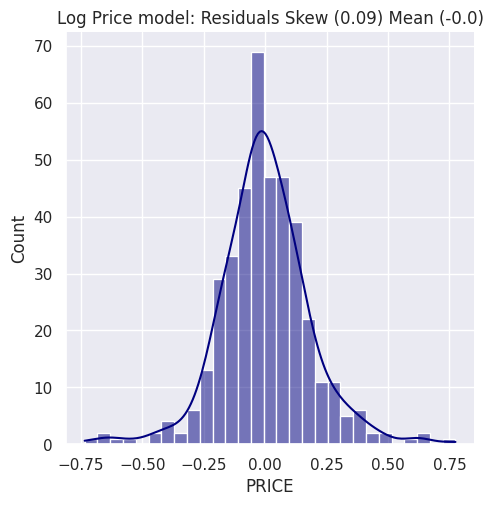

In [ ]:
log_resid_mean = round(log_residuals.mean(), 2)
log_resid_skew = round(log_residuals.skew(), 2)

sns.displot(log_residuals, kde=True, color='navy')
plt.title(f'Log Price model: Residuals Skew ({log_resid_skew}) Mean ({log_resid_mean})')
plt.show()

# Compare Out of Sample Performance

The *real* test is how our model performs on data that it has not "seen" yet.

Compare the r-squared of the two models on the test dataset.

In [ ]:
test_rsquare = regression.score(X_test, y_test)
log_rsquare = log_regression.score(X_test, log_y_test)

In [ ]:
print(f'Original Model Test Data r-squared: {test_rsquare:.2}')
print(f'Log Model Test Data r-squared: {log_rsquare:.2}')

Original Model Test Data r-squared: 0.67
Log Model Test Data r-squared: 0.74


# Predict a Property's Value using the Regression Coefficients

Our preferred model now has an equation that looks like this:

$$ \log (PR \hat ICE) = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta_3 DIS + \theta _4 CHAS + ... + \theta _{13} LSTAT $$

The average property has the mean value for all its charactistics:

In [ ]:
# Starting Point: Average Values in the Dataset
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)),
                              columns=features.columns)
property_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65


Predict how much the average property is worth using the stats above. What is the log price estimate and what is the dollar estimate?

In [ ]:
log_estimate = log_regression.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')

# dollar_est = np.e**log_estimate * 1000
dollar_est = np.exp(log_estimate) * 1000
print(f'The property is estimated to be worth ${dollar_est:.6}')

The log price estimate is $3.03
The property is estimated to be worth $20703.2


Keeping the average values for CRIM, RAD, INDUS and others, value a property with the following characteristics:

In [ ]:
# Define Property Characteristics
next_to_river = True
nr_rooms = 8
students_per_classroom = 20
distance_to_town = 5
pollution = data.NOX.quantile(q=0.75) # high
amount_of_poverty =  data.LSTAT.quantile(q=0.25) # low

In [ ]:
# Solution:
property_stats['RM'] = nr_rooms
property_stats['PTRATIO'] = students_per_classroom
property_stats['DIS'] = distance_to_town

if next_to_river:
  property_stats['CHAS'] = 1
else:
  property_stats['CHAS'] = 0

property_stats['NOX'] = pollution
property_stats['LSTAT'] = amount_of_poverty

In [ ]:
log_estimate = log_regression.predict(property_stats)[0]
print(f'The log price estimate is ${log_estimate:.3}')

dollar_est = np.e**log_estimate * 1000
print(f'The property is estimated to be worth ${dollar_est:.6}')

The log price estimate is $3.25
The property is estimated to be worth $25792.0
